In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install -q -U git+https://github.com/sbrugman/SDGym.git@v0.2.2-hw

In [ ]:
!pip install -q -U ../../

In [2]:
from timeit import default_timer as timer
from functools import partial
from random import choices
import logging

In [3]:
import sdgym
from sdgym import load_dataset
from sdgym import benchmark
from sdgym import load_dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
import pgmpy

from pgmpy.models import BayesianModel
from pgmpy.estimators import TreeSearch, HillClimbSearch, BicScore, ExhaustiveSearch, BayesianEstimator
from pgmpy.sampling import BayesianModelSampling

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.isotonic import IsotonicRegression

In [8]:
from sklearn.metrics import (
    mutual_info_score,
    adjusted_mutual_info_score,
    normalized_mutual_info_score,
)

In [9]:
from scipy import interpolate

In [10]:
from synthsonic.models.kde_utils import kde_smooth_peaks_1dim, kde_smooth_peaks
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
logging.basicConfig(level=logging.INFO)

In [13]:
dataset_name = 'mnist12'

In [14]:
data, categorical_columns, ordinal_columns = load_dataset(dataset_name)

INFO:sdgym.data:Loading dataset mnist12 (all variables)


In [15]:
data.shape

(60000, 145)

In [16]:
categorical_columns, ordinal_columns

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144],
 [])

In [16]:
for i in range(data.shape[1]):
    print (i, len(np.unique(data[:, i])))

0 1
1 1
2 1
3 2
4 2
5 2
6 2
7 2
8 2
9 1
10 1
11 1
12 1
13 1
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 1
24 1
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 2
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 2
53 2
54 2
55 2
56 2
57 2
58 2
59 2
60 2
61 2
62 2
63 2
64 2
65 2
66 2
67 2
68 2
69 2
70 2
71 2
72 1
73 2
74 2
75 2
76 2
77 2
78 2
79 2
80 2
81 2
82 2
83 2
84 1
85 2
86 2
87 2
88 2
89 2
90 2
91 2
92 2
93 2
94 2
95 2
96 1
97 2
98 2
99 2
100 2
101 2
102 2
103 2
104 2
105 2
106 2
107 2
108 1
109 2
110 2
111 2
112 2
113 2
114 2
115 2
116 2
117 2
118 2
119 1
120 1
121 2
122 2
123 2
124 2
125 2
126 2
127 2
128 2
129 2
130 2
131 1
132 1
133 1
134 2
135 2
136 2
137 2
138 2
139 2
140 2
141 2
142 1
143 1
144 10


(array([5923.,    0.,    0.,    0., 6742.,    0.,    0.,    0., 5958.,
           0.,    0.,    0.,    0., 6131.,    0.,    0.,    0., 5842.,
           0.,    0.,    0.,    0., 5421.,    0.,    0.,    0., 5918.,
           0.,    0.,    0.,    0., 6265.,    0.,    0.,    0., 5851.,
           0.,    0.,    0., 5949.]),
 array([0.   , 0.225, 0.45 , 0.675, 0.9  , 1.125, 1.35 , 1.575, 1.8  ,
        2.025, 2.25 , 2.475, 2.7  , 2.925, 3.15 , 3.375, 3.6  , 3.825,
        4.05 , 4.275, 4.5  , 4.725, 4.95 , 5.175, 5.4  , 5.625, 5.85 ,
        6.075, 6.3  , 6.525, 6.75 , 6.975, 7.2  , 7.425, 7.65 , 7.875,
        8.1  , 8.325, 8.55 , 8.775, 9.   ]),
 <a list of 40 Patch objects>)

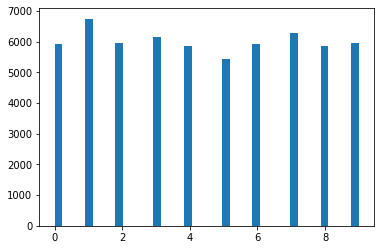

In [17]:
plt.hist(data[:, 144], bins=40)

In [18]:
data[:, 0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

# run sdgym

In [19]:
def KDECopulaNNPdf_Synthesizer(real_data, categorical_columns, ordinal_columns):
    all_features = list(range(real_data.shape[1]))
    numerical_features = list(set(all_features) - set(categorical_columns + ordinal_columns))
    data = np.float64(real_data)
    
    n_samples = data.shape[0]
    n_features = data.shape[1]
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        reg_lambda=1,
        gamma=0,
        max_depth=9
    )
#     clf = MLPClassifier(alpha=0.1, random_state=0, max_iter=1000, early_stopping=True)
    
    kde = KDECopulaNNPdf(
        use_KDE=False, 
        categorical_columns=categorical_columns+ordinal_columns,
        distinct_threshold=-1,
        n_uniform_bins=30,
        n_calibration_bins=100,
        test_size=0.2,
#        clf=clf,
#         ordering='mi',
    )
    kde = kde.fit(data)
    
#     X_gen, sample_weight = kde.sample(n_samples)
    X_gen = kde.sample_no_weights(n_samples, show_progress=True, mode='cheap')
    
    X_gen[:, categorical_columns+ordinal_columns] = np.round(X_gen[:, categorical_columns+ordinal_columns])
    X_gen = np.float32(X_gen)
    
    return X_gen

In [20]:
def KDECopulaNNPdf_SynthesizerInteger(real_data, categorical_columns, ordinal_columns):
    """Census has integer only..."""
    data = KDECopulaNNPdf_Synthesizer(real_data, categorical_columns, ordinal_columns)
    data = np.round(data)
    
    print(data[:, :5])

    return data

In [21]:
from sdgym.synthesizers import (
    CLBNSynthesizer, CTGANSynthesizer, IdentitySynthesizer, IndependentSynthesizer,
    MedganSynthesizer, PrivBNSynthesizer, TableganSynthesizer, TVAESynthesizer,
    UniformSynthesizer, VEEGANSynthesizer)

all_synthesizers = [
    #IdentitySynthesizer,
    #IndependentSynthesizer,
    KDECopulaNNPdf_Synthesizer,
    #KDECopulaNNPdf_SynthesizerInteger,
]

In [22]:
scores = sdgym.run(synthesizers=all_synthesizers, datasets=[dataset_name], iterations=1)

INFO:sdgym.benchmark:0%|          | 0/1 [00:00<?, ?it/s]
INFO:sdgym.benchmark:Evaluating KDECopulaNNPdf_Synthesizer on dataset mnist12; iteration 0; 278.06 MB
INFO:sdgym.data:Loading dataset mnist12 (all variables)
INFO:sdgym.benchmark:Running KDECopulaNNPdf_Synthesizer on dataset mnist12; iteration 0; 286.8 MB
INFO:KDECopulaNNPdf:Processing 0 numerical and 145 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 250000 data points.

Generating for node: 121:  34%|███▍      | 49/145 [00:26<00:40,  2.37it/s]


Generating for node: 105:  70%|██████▉   | 101/145 [00:42<00:12,  3.65it/s]


Generating for node: 66: 100%|██████████| 145/145 [00:52<00:00,  2.74it/s]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 145 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:Maximum weight found: 1078.4760005147343
INFO:KDECopulaNNPdf:Generating 60000 data points.

Generating for node: 131:   6%|▌         | 8/145 [00:01<00:17,  8.02it/s]


Generating for node: 102:  53%|█████▎    | 77/145 [00:07<00:05, 12.37it/s]


Generating for node: 66: 100%|██████████| 145/145 [00:11<00:00, 12.20it/s]
INFO:sdgym.benchmark:Scoring KDECopulaNNPdf_Synthesizer on dataset mnist12; iteration 0; 694.5 MB
INFO:sdgym.evaluate:Evaluating using multiclass classifier DecisionTreeClassifier
INFO:sdgym.evaluate:Evaluating using multiclass classifier MLPClassifier
INFO:sdgym.benchmark:Finished KDECopulaNNPdf_Synthesizer on dataset mnist12; iteration 0; 666.01 MB


INFO:sdgym.benchmark:100%|##########| 1/1 [03:43<00:00, 223.66s/it]


In [23]:
scores

,mnist12/accuracy,mnist12/macro_f1,mnist12/micro_f1,timestamp
VEEGANSynthesizer,0.374683,0.349571,0.374683,2020-04-12 09:41:35.096775
CLBNSynthesizer,0.720100,0.715383,0.720100,2020-10-17 09:46:54.494331
CTGAN,0.122317,0.108111,0.122317,2020-10-17 09:46:54.494331
CTGANSynthesizer,0.146750,0.116861,0.146750,2020-10-17 09:46:54.494331
CopulaGAN,0.159017,0.127991,0.159017,2020-10-17 09:46:54.494331
GaussianCopulaCategorical,0.124767,0.121156,0.124767,2020-10-17 09:46:54.494331
GaussianCopulaCategoricalFuzzy,0.168400,0.156581,0.168400,2020-10-17 09:46:54.494331
GaussianCopulaOneHot,0.485383,0.452514,0.485383,2020-10-17 09:46:54.494331
IdentitySynthesizer,0.880483,0.878882,0.880483,2020-10-17 09:46:54.494331
IndependentSynthesizer,0.099217,0.098403,0.099217,2020-10-17 09:46:54.494331


In [24]:
scores.tail(4)

,mnist12/accuracy,mnist12/macro_f1,mnist12/micro_f1,timestamp
TVAESynthesizer,0.779117,0.775817,0.779117,2020-10-17 09:46:54.494331
TableganSynthesizer,0.087200,0.079515,0.087200,2020-10-17 09:46:54.494331
UniformSynthesizer,0.098567,0.089108,0.098567,2020-10-17 09:46:54.494331
KDECopulaNNPdf_Synthesizer,0.631950,0.629056,0.631950,2021-05-17 19:34:34.003073
